## Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  https://github.com/zalandoresearch/fashion-mnist

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
#Create data matrix X and label vector Y for both the train and test set
(X_train, Y_train), (X_test, Y_train) = fashion_mnist.load_data()

In [3]:
#Each label from 0 to 9 has a class name. We need to store it with our data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration and Pre-Proprocessing

<function matplotlib.pyplot.show(*args, **kw)>

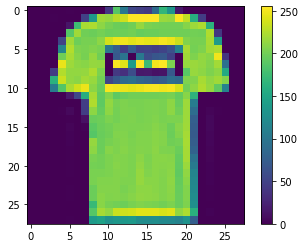

In [4]:
#Inspect an image from the train set
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show

In [5]:
#Scale the data between 0 to 1
X_train = X_train /255.0 #Covert int to float
X_test = X_test /255.0

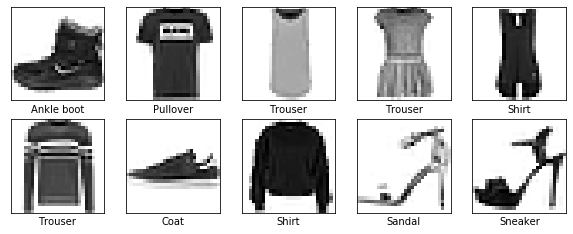

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()
    

## Create MLP Model

In [7]:
#Set up layers of the NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Layer-1: Tranform 2d-array of 28x28 into 1d-array of 28*28=784 pixels
    keras.layers.Dense(128, activation='relu'), #Layer-2: Densely(Fully) connected neurals with 128 neurons
    keras.layers.Dense(10) #Layer-3: Densely connected layer with 10 nodes, one for each class
])

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
-  Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [8]:
#Compile the model to include additional settings
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [9]:
#Train the model
model.fit(X_train, Y_train, epochs=10)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 10000 target samples.